<a href="https://colab.research.google.com/github/spmian/Artificial-Intelligence-Project/blob/main/03_ModelosSupervisados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importar librerias**

In [ ]:
# Importar librerias requeridad
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats 
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer


In [ ]:
# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline 
sns.set(color_codes=True)

# **2. Cargar Base de Datos**

In [ ]:
df = pd.read_csv("train.csv", index_col="id")
df.head(5)

,title,city,postalCode,latitude,longitude,areaSqm,firstSeenAt,lastSeenAt,isRoomActive,rawAvailability,...,living,pets,smokingInside,matchAge,matchGender,matchCapacity,matchLanguages,matchStatus,coverImageUrl,rent
id,,,,,,,,,,,,,,,,,,,,,
0,West-Varkenoordseweg,Rotterdam,3074HN,51.896601,4.514993,14,2019-07-14 11:25:46.511000+00:00,2019-07-26 22:18:23.142000+00:00,True,26-06-'19 - Indefinite period,...,None,No,No,16 years - 99 years,Not important,1 person,Not important,Not important,https://resources.kamernet.nl/image/913b4b03-5...,500
3,Ruiterakker,Assen,9407BG,53.013494,6.561012,16,2019-07-14 11:25:46.988000+00:00,2019-07-18 22:00:31.174000+00:00,False,16-06-'19 - Indefinite period,...,None,No,Yes,18 years - 32 years,Female,1 person,Not important,"Student, Working student",https://resources.kamernet.nl/image/84e95365-6...,290
8,Brusselseweg,Maastricht,6217GX,50.860841,5.671673,16,2019-07-14 11:25:47.814000+00:00,2019-08-10 00:14:27.130000+00:00,True,15-07-'19 - Indefinite period,...,None,No,No,16 years - 40 years,Male,4 persons,Dutch English,Student,https://resources.kamernet.nl/image/6e625591-d...,425
10,Donkerslootstraat,Rotterdam,3074WL,51.893195,4.516478,25,2019-07-14 11:25:48.140000+00:00,2019-07-16 06:05:32.183000+00:00,False,01-08-'19 - Indefinite period,...,None,No,No,21 years - 99 years,Not important,4 persons,Dutch English Spanish French Italian German Po...,"Student, Working student, Working, Looking for...",https://resources.kamernet.nl/image/ea3aea77-0...,600
12,Vorselenburgstraat,Alphen aan den Rijn,2405XJ,52.122335,4.661434,10,2019-07-14 11:25:48.465000+00:00,2019-08-01 00:02:40.516000+00:00,True,08-07-'19 - Indefinite period,...,None,No,Yes,22 years - 40 years,Not important,1 person,Dutch English,"Student, Working student, Working",https://resources.kamernet.nl/image/d0780298-b...,425


In [ ]:
# Análisis Descriptivo
df.describe()

,latitude,longitude,areaSqm,rent
count,27915.000000,27915.000000,27915.000000,27915.000000
mean,52.202204,5.313306,31.667240,669.505212
std,0.516437,0.798895,29.727405,416.156758
min,50.770041,3.546485,6.000000,1.000000
25%,51.925678,4.706450,14.000000,395.000000
50%,52.163189,5.082886,20.000000,550.000000
75%,52.370862,5.892056,40.000000,800.000000
max,53.434608,7.206637,600.000000,5999.000000


In [ ]:
# Número de datos ausentes por variable
df.isna().sum().sort_values()

title                           0
coverImageUrl                   0
propertyType                    0
rawAvailability                 0
lastSeenAt                      0
firstSeenAt                     0
rent                            0
longitude                       0
latitude                        0
postalCode                      0
city                            0
areaSqm                         0
postedAgo                       6
matchStatus                    63
matchLanguages                 63
matchCapacity                  63
matchGender                    63
matchAge                       63
smokingInside                  63
pets                           63
living                         63
kitchen                        63
energyLabel                    63
shower                         63
internet                       63
isRoomActive                   63
toilet                         63
descriptionNonTranslated      111
furnish                       214
gender        

# **3. Inspección de la Variable Respuesta**


Me va permitir conocer como está compuesto el precio de alquiler que quiero predecir, que tan alejados están entre si y cuál es su distribución

In [ ]:
# Análisis Descriptivo
df['rent'].describe().round(2)

count    27915.00
mean       669.51
std        416.16
min          1.00
25%        395.00
50%        550.00
75%        800.00
max       5999.00
Name: rent, dtype: float64

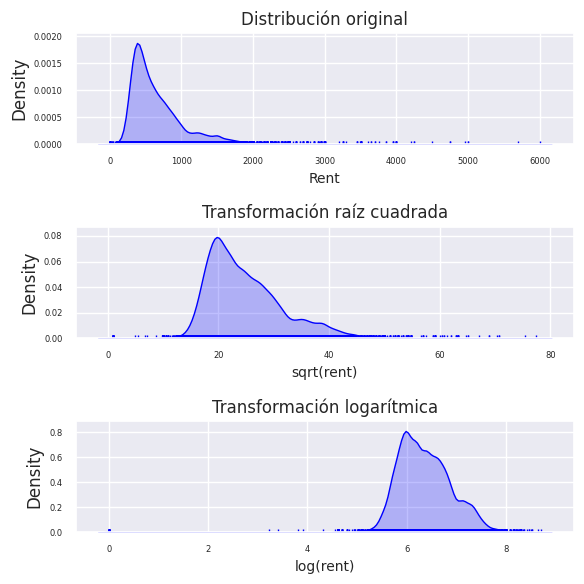

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.kdeplot(
    df.rent,
    fill    = True,
    color   = "blue",
    ax      = axes[0]
)
sns.rugplot(
    df.rent,
    color   = "blue",
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('Rent', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.kdeplot(
    np.sqrt(df.rent,),
    fill    = True,
    color   = "blue",
    ax      = axes[1]
)
sns.rugplot(
    np.sqrt(df.rent,),
    color   = "blue",
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(rent)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.kdeplot(
    np.log(df.rent,),
    fill    = True,
    color   = "blue",
    ax      = axes[2]
)
sns.rugplot(
    np.log(df.rent,),
    color   = "blue",
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(rent)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [ ]:
# Simetria y Curtosis
print('Asimetria:',df['rent'].skew().round(2), '  Curtosis:', df['rent'].kurt().round(2))

Asimetria: 2.36   Curtosis: 10.36


### Transformación
Como vimos en una primera etapa la gráficas de distribución no era normal del todo, usaremos stats para validar y transformar a una distribución normal

<ipython-input-11-4de6fba63884>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rent'], fit = norm);


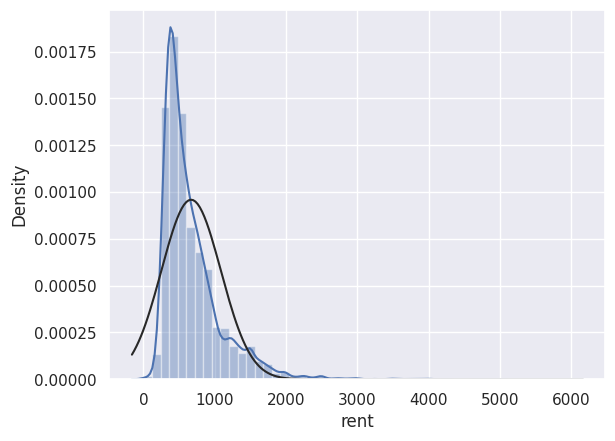

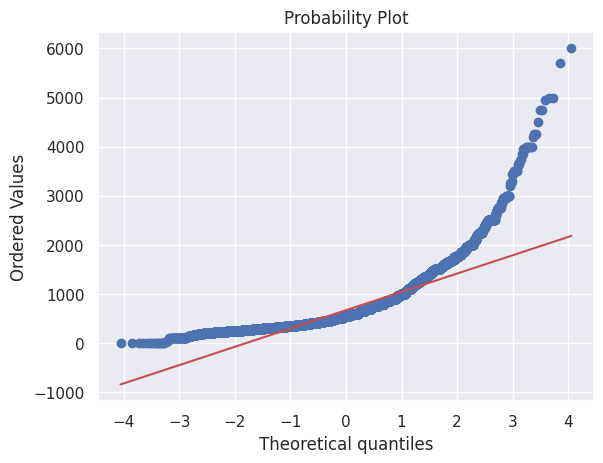

In [ ]:
# Distribución no normal actual
sns.distplot(df['rent'], fit = norm);
fig = plt.figure()
res = stats.probplot(df['rent'], plot = plt)



*   Se muestra la curvatura actual vs una curvatura normal
*   El porbability plot también muestra desfases que indican que no es una distribución normal

#Transformamos la distribución para normalizarla

In [ ]:
# transformando la distribución 
df['rent'] = np.log(df['rent'])

<ipython-input-13-d1829a5e39ec>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rent'], fit=norm);


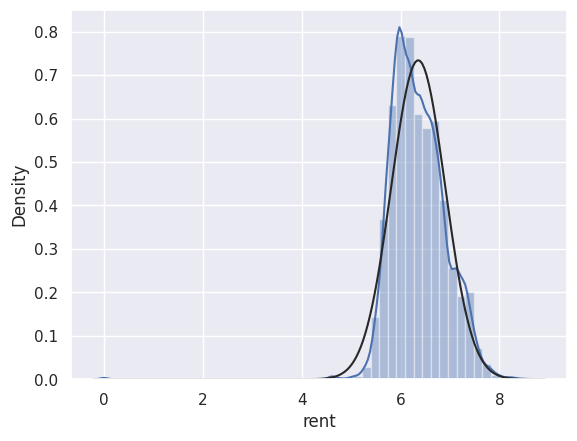

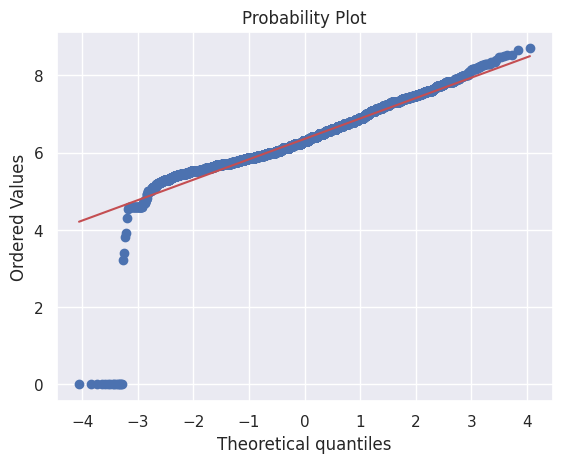

In [ ]:
# Distribución transformada con log
sns.distplot(df['rent'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['rent'], plot=plt)

* Ahora vemos que la curva de la distribución se asemeja más a la curva normal
* Tambien se muestran menos desfases que el caso anterior, indicadonos que tiene ahora sí una distribución normal

# **4. Tratamiento de los datos:**

# Eliminación de los datos nulos o faltantes en la variable respuesta

In [ ]:
rent_zero = list(df[df.rent == 0].index) 
df.drop(rent_zero, axis = 0, inplace = True) 
print('Nuevo tamaño de los datos: ',df.shape)

Nuevo tamaño de los datos:  (27900, 33)


# Eliminación de las columnas con muchos datos faltantes

Del análisis exploratorio de las variables, se encontró que existen variables que contienen gran cantidad de datos faltantes. En este caso se optará por eliminar las columnas en las que los datos faltantes representen el 80% o más de la totalidad de los datos. Siguiendo este criterio se eliminan las variables "rentDetail", "descriptionTranslated ".

In [ ]:
criterio = len(df) * 0.8
df.dropna(axis=1, thresh = criterio, inplace = True) 
print('New Shape of Train Data:',df.shape)

New Shape of Train Data: (27900, 31)


# Transformación de las variables categoricas

La variable categorica, como lo son en este caso "roommate"  puede ser util a la hora de realizar el análisis, sin embargo, no pueden usadas en la forma categorica, por lo que se deben convertir en variable numerica  que si podamos utilzar para entrenar un modelo.

In [ ]:
var_categoricas = ['roommates']
encoder = preprocessing.LabelEncoder()

for i in var_categoricas:
    
    df[i] = encoder.fit_transform(df[i])
    
print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27900 entries, 0 to 46721
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title                     27900 non-null  object 
 1   city                      27900 non-null  object 
 2   postalCode                27900 non-null  object 
 3   latitude                  27900 non-null  float64
 4   longitude                 27900 non-null  float64
 5   areaSqm                   27900 non-null  int64  
 6   firstSeenAt               27900 non-null  object 
 7   lastSeenAt                27900 non-null  object 
 8   isRoomActive              27837 non-null  object 
 9   rawAvailability           27900 non-null  object 
 10  postedAgo                 27894 non-null  object 
 11  descriptionNonTranslated  27789 non-null  object 
 12  propertyType              27900 non-null  object 
 13  furnish                   27686 non-null  object 
 14  energy

#Relleno de datos faltantes

Como anteriormente la variable "roommates" era categorica y se transformo en una variable númerica, sigue teniendo muchas datos faltantes, los valores faltantes seran reemplazarlos por la media de los datos de esa variable

In [ ]:
df['roommates'].fillna(df.roommates.median(), inplace=True)

In [ ]:
df.isnull().sum()

title                         0
city                          0
postalCode                    0
latitude                      0
longitude                     0
areaSqm                       0
firstSeenAt                   0
lastSeenAt                    0
isRoomActive                 63
rawAvailability               0
postedAgo                     6
descriptionNonTranslated    111
propertyType                  0
furnish                     214
energyLabel                  63
gender                      536
internet                     63
roommates                     0
shower                       63
toilet                       63
kitchen                      63
living                       63
pets                         63
smokingInside                63
matchAge                     63
matchGender                  63
matchCapacity                63
matchLanguages               63
matchStatus                  63
coverImageUrl                 0
rent                          0
dtype: i

Para las variables categoricas a las cuales se hacen falta datos, se les asignará el valor mas frecuente de la variable a los datos faltantes.  

In [ ]:
#variables_con_faltantes = ['isRoomActive','postedAgo ','descriptionNonTranslated','furnish','energyLabel ','gender ','internet ','shower','toilet']
V_categoricas = [i for i in df if not i in df._get_numeric_data()]
print (V_categoricas)


['title', 'city', 'postalCode', 'firstSeenAt', 'lastSeenAt', 'isRoomActive', 'rawAvailability', 'postedAgo', 'descriptionNonTranslated', 'propertyType', 'furnish', 'energyLabel', 'gender', 'internet', 'shower', 'toilet', 'kitchen', 'living', 'pets', 'smokingInside', 'matchAge', 'matchGender', 'matchCapacity', 'matchLanguages', 'matchStatus', 'coverImageUrl']


In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
df[V_categoricas] = imputer.fit_transform(df[V_categoricas])


In [ ]:
df.isnull().sum()

title                       0
city                        0
postalCode                  0
latitude                    0
longitude                   0
areaSqm                     0
firstSeenAt                 0
lastSeenAt                  0
isRoomActive                0
rawAvailability             0
postedAgo                   0
descriptionNonTranslated    0
propertyType                0
furnish                     0
energyLabel                 0
gender                      0
internet                    0
roommates                   0
shower                      0
toilet                      0
kitchen                     0
living                      0
pets                        0
smokingInside               0
matchAge                    0
matchGender                 0
matchCapacity               0
matchLanguages              0
matchStatus                 0
coverImageUrl               0
rent                        0
dtype: int64

In [ ]:
df.head()

,title,city,postalCode,latitude,longitude,areaSqm,firstSeenAt,lastSeenAt,isRoomActive,rawAvailability,...,living,pets,smokingInside,matchAge,matchGender,matchCapacity,matchLanguages,matchStatus,coverImageUrl,rent
id,,,,,,,,,,,,,,,,,,,,,
0,West-Varkenoordseweg,Rotterdam,3074HN,51.896601,4.514993,14,2019-07-14 11:25:46.511000+00:00,2019-07-26 22:18:23.142000+00:00,True,26-06-'19 - Indefinite period,...,None,No,No,16 years - 99 years,Not important,1 person,Not important,Not important,https://resources.kamernet.nl/image/913b4b03-5...,6.214608
3,Ruiterakker,Assen,9407BG,53.013494,6.561012,16,2019-07-14 11:25:46.988000+00:00,2019-07-18 22:00:31.174000+00:00,False,16-06-'19 - Indefinite period,...,None,No,Yes,18 years - 32 years,Female,1 person,Not important,"Student, Working student",https://resources.kamernet.nl/image/84e95365-6...,5.669881
8,Brusselseweg,Maastricht,6217GX,50.860841,5.671673,16,2019-07-14 11:25:47.814000+00:00,2019-08-10 00:14:27.130000+00:00,True,15-07-'19 - Indefinite period,...,None,No,No,16 years - 40 years,Male,4 persons,Dutch English,Student,https://resources.kamernet.nl/image/6e625591-d...,6.052089
10,Donkerslootstraat,Rotterdam,3074WL,51.893195,4.516478,25,2019-07-14 11:25:48.140000+00:00,2019-07-16 06:05:32.183000+00:00,False,01-08-'19 - Indefinite period,...,None,No,No,21 years - 99 years,Not important,4 persons,Dutch English Spanish French Italian German Po...,"Student, Working student, Working, Looking for...",https://resources.kamernet.nl/image/ea3aea77-0...,6.396930
12,Vorselenburgstraat,Alphen aan den Rijn,2405XJ,52.122335,4.661434,10,2019-07-14 11:25:48.465000+00:00,2019-08-01 00:02:40.516000+00:00,True,08-07-'19 - Indefinite period,...,None,No,Yes,22 years - 40 years,Not important,1 person,Dutch English,"Student, Working student, Working",https://resources.kamernet.nl/image/d0780298-b...,6.052089


In [ ]:
# Variables numéricas
df.select_dtypes(include=['float64', 'int']).describe()

,latitude,longitude,areaSqm,roommates,rent
count,27900.000000,27900.000000,27900.000000,27900.000000,27900.000000
mean,52.202306,5.313228,31.673082,5.011039,6.360223
std,0.516530,0.798979,29.731971,4.039229,0.523045
min,50.770041,3.546485,6.000000,0.000000,3.218876
25%,51.925706,4.705798,14.000000,1.000000,5.978886
50%,52.163253,5.082817,20.000000,3.000000,6.309918
75%,52.370890,5.892404,40.000000,9.000000,6.684612
max,53.434608,7.206637,600.000000,11.000000,8.699348


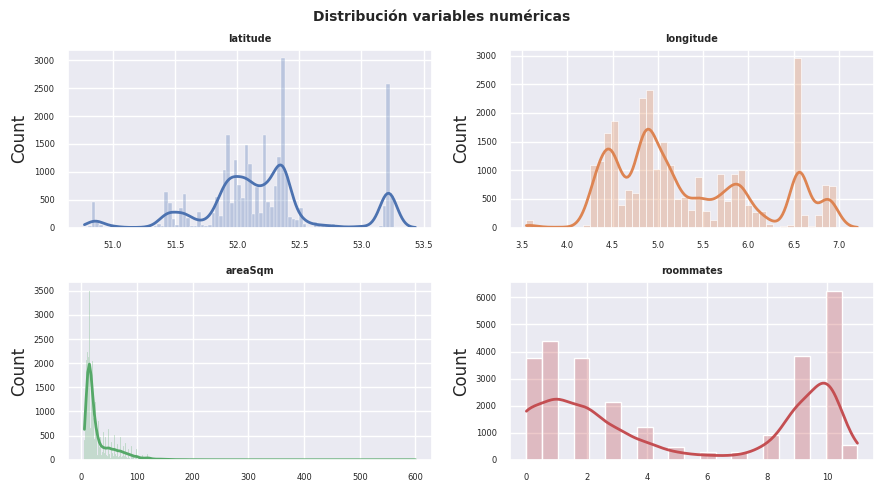

In [ ]:
# Gráfico de distribución para cada variable numérica

# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('rent')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = df,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

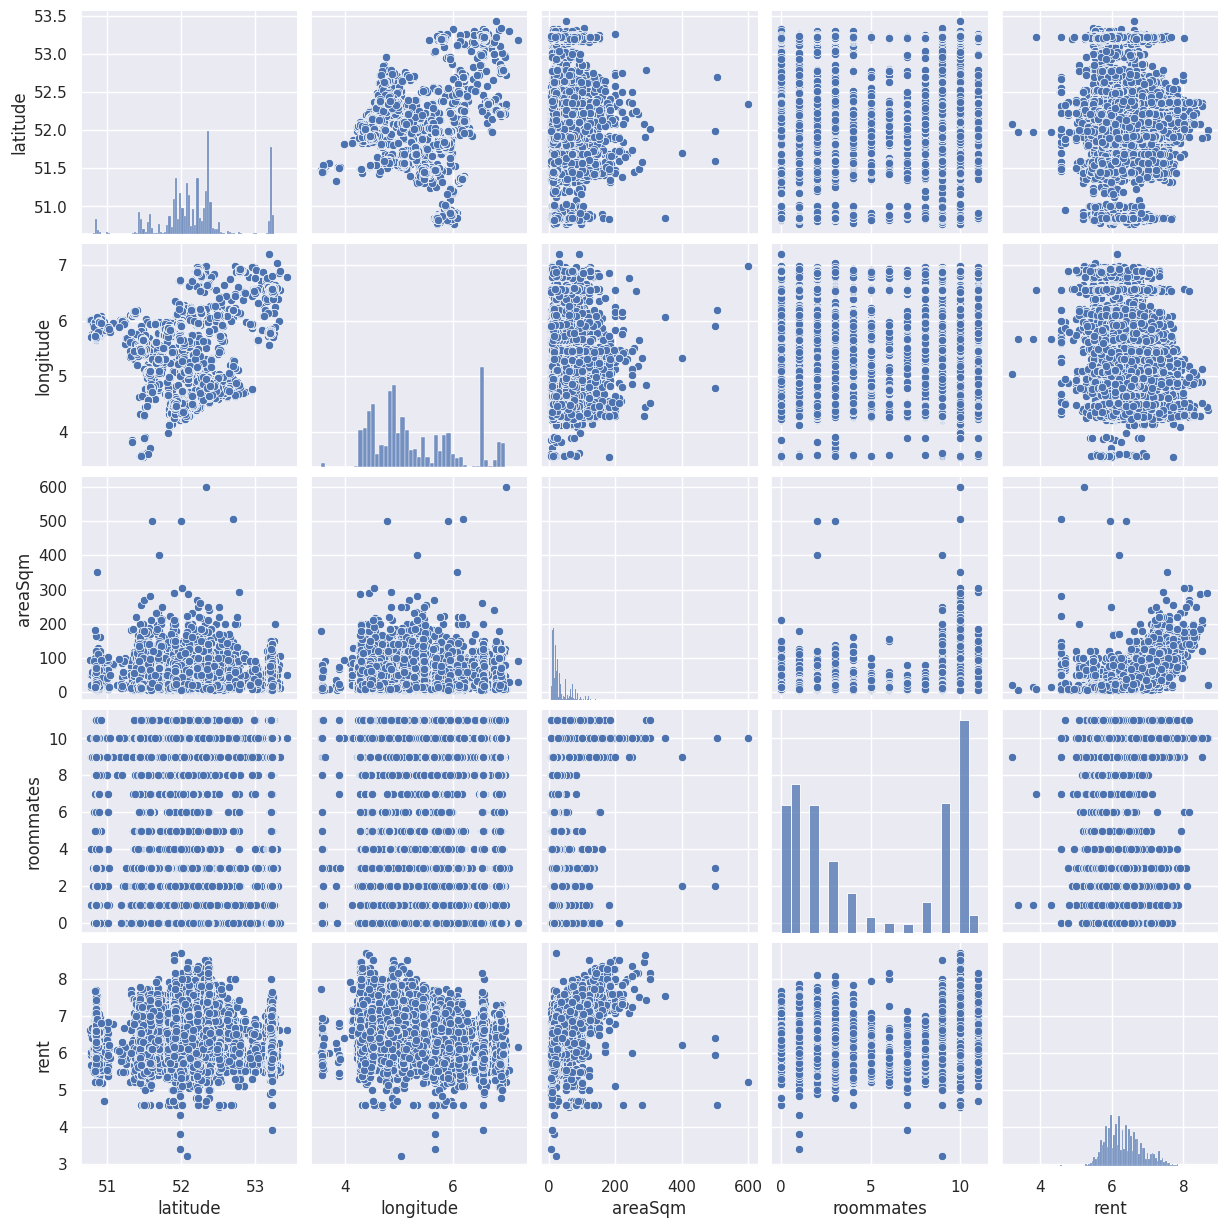

In [ ]:
cols = ['latitude', 'longitude', 'areaSqm', 'roommates','rent']
#cols = np.unique(list(np.random.permutation(df._get_numeric_data().columns)[:5])+['rent'])
sns.set()
sns.pairplot(df[cols])

##Métodos Supervisados

#Métrica:
La métrica para medir el desempeño de los modelos es MAE (error absoluto medio) entre el valor predicho y el precio observado.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error



In [ ]:
# Preparar los datos de entrenamiento y prueba
X = df.drop(columns = ['rent']).copy()
y = df['rent']


*   Para este ejercicio definimos train como el 75% de la data
*   Test el 10% de la data
*   Validador el 15% de la data






In [ ]:
train = 0.75
val = 0.15
test = 0.10

# split train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train)

# split test
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = test/(test + val)) 


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Identificar variables categóricas
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Aplicar codificación one-hot a las variables categóricas
ct = ColumnTransformer([('encoder', OneHotEncoder(), categorical_cols)],
                       remainder='passthrough')

X_encoded = ct.fit_transform(pd.concat([X_train, X_test])) # Combina los datos de entrenamiento y prueba para asegurarse de que todas las categorías estén presentes

X_train_encoded = X_encoded[:len(X_train)]
X_test_encoded = X_encoded[len(X_train):]

# Entrenar y evaluar el modelo de Regresión Lineal

In [ ]:
reg_lin = LinearRegression()
reg_lin.fit(X_train_encoded, y_train)
pred_reg_lin = reg_lin.predict(X_test_encoded)
df_reg_lin = pd.DataFrame({'Actual': y_test, 'Predicho': pred_reg_lin})

In [ ]:
df_reg_lin.sample(3).round(2)

,Actual,Predicho
id,,
39236,5.98,6.01
6949,6.62,6.56
38286,7.24,7.15


In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train_encoded, y_train)
regression_predictions = regression_model.predict(X_test_encoded)
regression_mae = round(mean_absolute_error(y_test, regression_predictions), 4)
print("Regresión Lineal MAE:", regression_mae)


Regresión Lineal MAE: 0.1526


#Entrenar y evaluar el modelo SVM

In [ ]:
svm = SVR()
svm.fit(X_train_encoded, y_train)
pred_svm = svm.predict(X_test_encoded)
df_svm = pd.DataFrame({'Actual': y_test, 'Predicho': pred_svm})

In [ ]:
df_svm.sample(3).round(2)

,Actual,Predicho
id,,
12551,8.15,7.72
8881,6.21,6.05
13694,7.21,7.06


In [ ]:
svm_model = SVR()
svm_model.fit(X_train_encoded, y_train)
svm_predictions = svm_model.predict(X_test_encoded)
svm_mae = round(mean_absolute_error(y_test, svm_predictions), 4)
print("SVM MAE:", svm_mae)

SVM MAE: 0.1804


# Entrenar y evaluar el modelo de Árbol de Decisión

In [ ]:
dctree = DecisionTreeRegressor()
dctree.fit(X_train_encoded, y_train)
pred_dctree = dctree.predict(X_test_encoded)
df_dctree = pd.DataFrame({'Actual': y_test, 'Predicho': pred_dctree})

In [ ]:
df_dctree.sample(3).round(2)

,Actual,Predicho
id,,
5322,6.01,5.62
38405,6.02,6.02
15761,6.40,6.40


In [ ]:

decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train_encoded, y_train)

# Realizar predicciones en el conjunto de prueba
decision_tree_predictions = decision_tree_model.predict(X_test_encoded)

# Calcular el MAE del modelo de Decision Tree
decision_tree_mae = round(mean_absolute_error(y_test, decision_tree_predictions), 4)
print("Árbol de Decisión MAE:", decision_tree_mae)

Árbol de Decisión MAE: 0.1684


In [ ]:
mae_df = pd.DataFrame({'Modelo': ('Regresion Lineal', 'SVM', 'Decision Tree',),
                       'MAE': (regression_mae, svm_mae, decision_tree_mae)})

mae_df.sort_values(by='MAE', ascending=True)


,Modelo,MAE
0,Regresion Lineal,0.1526
2,Decision Tree,0.1684
1,SVM,0.1804


El modelo de Regresión Lineal tiene el valor de MAE más bajo, lo que indica que tiene un mejor rendimiento en términos de precisión de predicción en comparación con los otros modelos evaluados. Por lo tanto, el modelo de Regresión Lineal se elige como el mejor modelo según el MAE.

[Text(0.5, 1.0, 'MAE por modelo')]

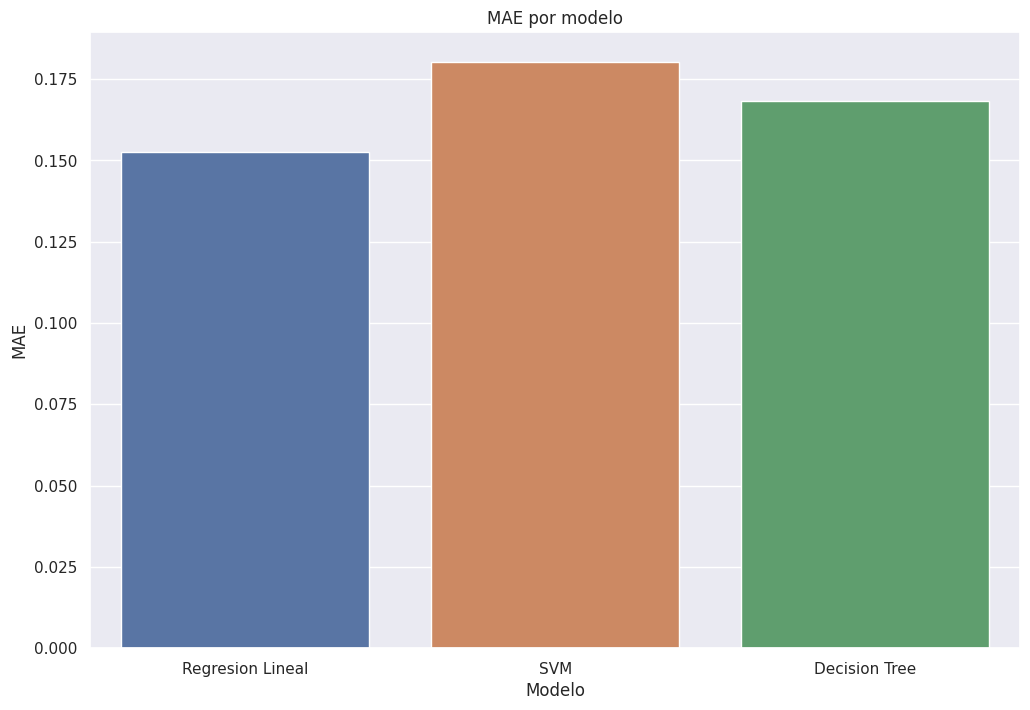

In [ ]:
# Vemos de forma grafica
plt.figure(figsize = (12,8))
sns.barplot(x = mae_df['Modelo'], y = mae_df['MAE']).set(title = 'MAE por modelo')

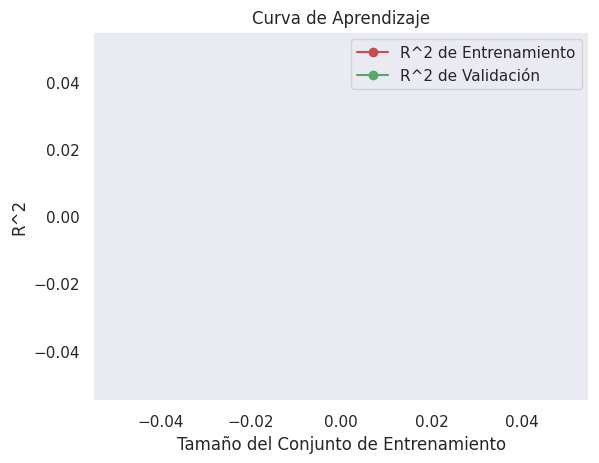

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X_train_encoded, y_train, cv, train_sizes):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)
    
    plt.figure()
    plt.title('Curva de Aprendizaje')
    plt.xlabel('Tamaño del Conjunto de Entrenamiento')
    plt.ylabel('R^2')
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='R^2 de Entrenamiento')
    plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='R^2 de Validación')
    plt.legend(loc='best')
    
    plt.show()

# Crear un modelo de regresión lineal
linear_reg = LinearRegression()

# Definir los tamaños de conjunto de entrenamiento que se evaluarán
train_sizes = np.linspace(0.1, 1.0, 10)

# Generar la curva de aprendizaje
plot_learning_curve(linear_reg, X_train, y_train, cv=5, train_sizes=train_sizes)
